In [41]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

''

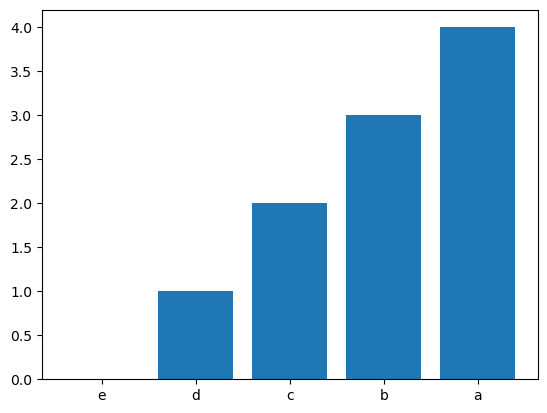

In [10]:
fig, ax = plt.subplots()

labels = ['e', 'd', 'c', 'b', 'a']
data = [0, 1, 2, 3, 4]
ax.bar(labels, data)

;

''

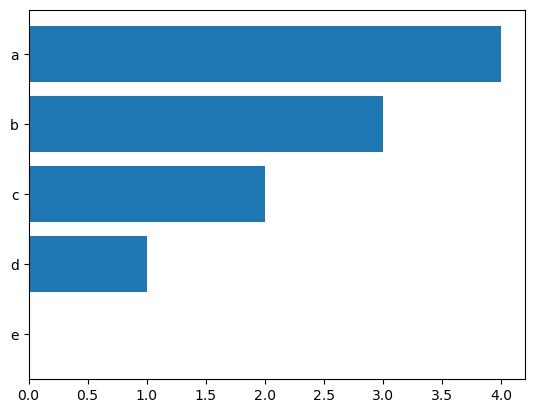

In [12]:
fig, ax = plt.subplots()

labels = ['e', 'd', 'c', 'b', 'a']
data = [0, 1, 2, 3, 4]
ax.barh(labels, data)

;

''

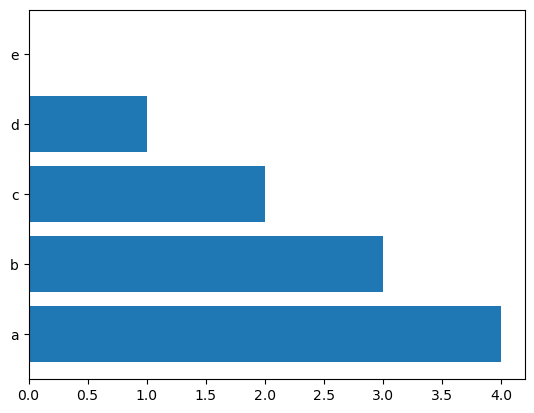

In [14]:
fig, ax = plt.subplots()

labels = ['e', 'd', 'c', 'b', 'a'][::-1] #reverse order
data = [0, 1, 2, 3, 4][::-1] #got to do both
ax.barh(labels, data)

;

In [2]:
housing_raw = pd.read_csv(
    '../Data/housing_data.csv',
    parse_dates = ['period_begin', 'period_end'],
    dtype = {'total_homes_sold' : 'Int32', 'region_name' : 'category'} 
) #category cuts down on processing time

In [19]:
ca_housing = (housing_raw.loc[
    (housing_raw['region_name'].str.contains('CA'))
].assign(region_name = housing_raw['region_name'].str[0:-11]).set_index('period_begin').sort_index())

ca_housing.head()

,region_name,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
period_begin,,,,,,,,
2017-01-02,Mono,2017-03-26,97,153.0,161.0,89.7,450745.8,21.208631
2017-01-02,Yolo,2017-03-26,336,234.0,272.0,48.5,447859.2,9.857470
2017-01-02,Stanislaus,2017-03-26,1192,912.0,1043.0,55.3,300302.0,10.971331
2017-01-02,Shasta,2017-03-26,7,17.0,18.0,147.5,489020.8,17.333333
2017-01-02,Lassen,2017-03-26,2,5.0,5.0,98.8,198750.0,5.500000


In [27]:
total_sold = (ca_housing
             .groupby('region_name')
             .agg({'total_homes_sold' : 'sum'})
              .sort_values('total_homes_sold', ascending = False)
              .iloc[:10]
             )

In [28]:
total_sold

,total_homes_sold
region_name,
Los Angeles,4622703
San Diego,2373289
Riverside,2335243
Orange,2004799
San Bernardino,1705727
Sacramento,1256838
Santa Clara,967707
Alameda,925469
Contra Costa,921039


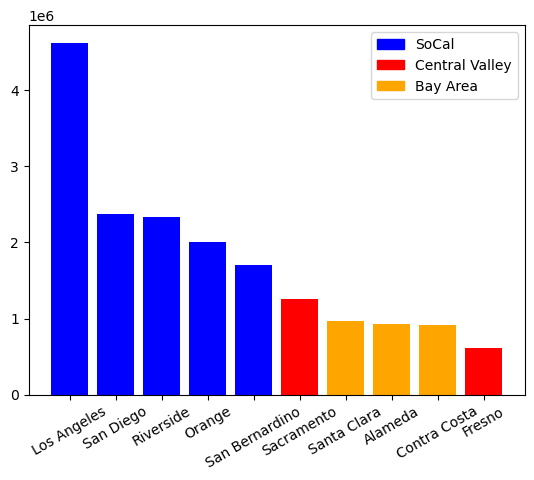

In [43]:
fig, ax = plt.subplots()
colors = ['blue', 'blue', 'blue', 'blue', 'blue', 'red', 'orange', 'orange', 'orange', 'red']

ax.bar(total_sold.index, total_sold['total_homes_sold'],
         color = colors)

socal = mpatches.Patch(color = 'blue', label = 'SoCal')
central = mpatches.Patch(color = 'red', label = "Central Valley")
bay = mpatches.Patch(color = 'orange', label = 'Bay Area')

plt.legend(handles = [socal, central, bay], loc = 'upper right')

ax.xaxis.set_tick_params(rotation = 30)

In [46]:
ca_or = housing_raw.loc[housing_raw['region_name'].str[-2:].isin(["CA", "OR", "WA"])]

In [47]:
ca_or.head()

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
6,"Sacramento County, CA",2020-06-22,2020-09-13,5107,1729.0,2206.0,27.5,445540.9,5.235794
19,"Garfield County, WA",2019-06-17,2019-09-08,7,9.0,10.0,52.7,152666.6,9.333333
26,"Gilliam County, OR",2018-06-18,2018-09-09,3,9.0,9.0,95.6,143037.5,9.000000
99,"Klickitat County, WA",2017-04-17,2017-07-09,48,53.0,58.0,87.2,326237.5,16.193434
124,"Jefferson County, WA",2017-02-06,2017-04-30,138,177.0,190.0,127.8,404637.5,22.486617


In [56]:
ca_or = ca_or.assign(
    price_range = pd.cut(
    ca_or.loc[:, "median_active_list_price"],
    [0, 400000, 600000, 2000000],
    labels = ["0-400K", "400-600K", "600K+"]),
    state = ca_or["region_name"].str[-2:]
)

In [57]:
ca_or.head()

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply,price_range,state
6,"Sacramento County, CA",2020-06-22,2020-09-13,5107,1729.0,2206.0,27.5,445540.9,5.235794,400-600K,CA
19,"Garfield County, WA",2019-06-17,2019-09-08,7,9.0,10.0,52.7,152666.6,9.333333,0-400K,WA
26,"Gilliam County, OR",2018-06-18,2018-09-09,3,9.0,9.0,95.6,143037.5,9.000000,0-400K,OR
99,"Klickitat County, WA",2017-04-17,2017-07-09,48,53.0,58.0,87.2,326237.5,16.193434,0-400K,WA
124,"Jefferson County, WA",2017-02-06,2017-04-30,138,177.0,190.0,127.8,404637.5,22.486617,400-600K,WA


In [58]:
ca_or = ca_or.query("period_end == '2021-08-01'").pivot_table(index = 'price_range', 
                                                              columns = 'state',
                                                             values = 'inventory',
                                                             aggfunc = 'sum')
ca_or.head()

state,CA,OR,WA
price_range,,,
0-400K,4267.0,1074.0,2143.0
400-600K,13877.0,4711.0,4858.0
600K+,35147.0,1229.0,3649.0


Text(0, 0.5, 'Homes Sold')

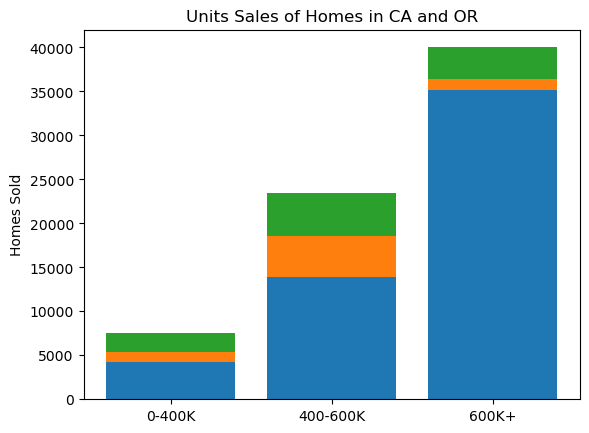

In [59]:
fig, ax = plt.subplots()

ax.bar(
    ca_or.index,
    ca_or['CA'],
    label = "California"
)

ax.bar(
    ca_or.index,
    ca_or['OR'],
    label = "Oregon",
    bottom = ca_or["CA"]
)

ax.bar(
    ca_or.index,
    ca_or['WA'],
    label = "Washington",
    bottom = ca_or["CA"] + ca_or["OR"]
)

ax.set_title("Units Sales of Homes in CA and OR")
ax.set_ylabel("Homes Sold")

ax.legend